In [118]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

sns.set_style('whitegrid')

In [119]:
ls

emails_by_address/                  my_feature_list.pkl
enron61702insiderpay.pdf            poi_email_addresses.py
explore.ipynb                       poi_id.py
final_project_dataset.pkl           poi_names.txt
final_project_dataset_modified.pkl  scatter_matrix.png
my_classifier.pkl                   tester.py
my_dataset.pkl                      tester.pyc


In [120]:
# load the data
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

In [121]:
# remove outliers
# in the previous course we know thre is an extreme outlier of the data
# the key is "TOTAL" and need to remove it
_ = data_dict.pop('TOTAL')

# KEN LAY seems to be quite an outlier
_ = data_dict.pop('LAY KENNETH L')

In [140]:
# replace "NaN" as numpy.nan
df = DataFrame(data_dict).T.replace('NaN', np.nan)
df_raw = df.copy()

In [123]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bonus,80,1129295,1293780,70000,418750,750000,1162500,8000000
deferral_payments,37,858864.5,1302648,-102500,77716,227449,875307,6426990
deferred_income,47,-587029.6,951340.1,-3504386,-639093.5,-144062,-37506,-833
director_fees,16,89822.88,41112.7,3285,83674.5,106164.5,112815,137864
exercised_stock_options,100,2645671,4527451,3285,503446,1200552,2354038,3.076606e+07
expenses,93,53701.26,46110.8,148,22344,46145,77978,228763
from_messages,85,615.5294,1850.893,12,22,41,146,14368
from_poi_to_this_person,85,64.21176,87.26275,0,10,35,67,528
from_this_person_to_poi,85,41.52941,100.6289,0,1,8,25,609
loan_advances,2,1200000,1131371,400000,800000,1200000,1600000,2000000


In [125]:
df.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

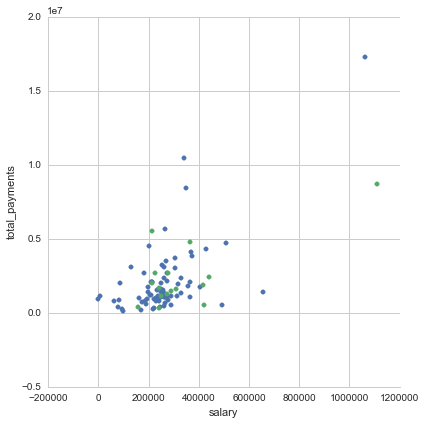

In [147]:
g = sns.FacetGrid(df_raw, hue = 'poi', size = 6)
g.map(plt.scatter, 'salary', 'total_payments')

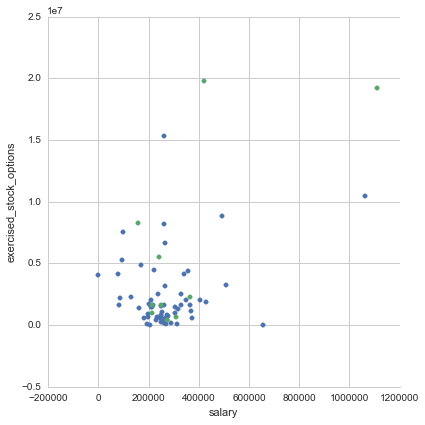

In [148]:
g = sns.FacetGrid(df_raw, hue = 'poi', size = 6)
g.map(plt.scatter, 'salary', 'exercised_stock_options')

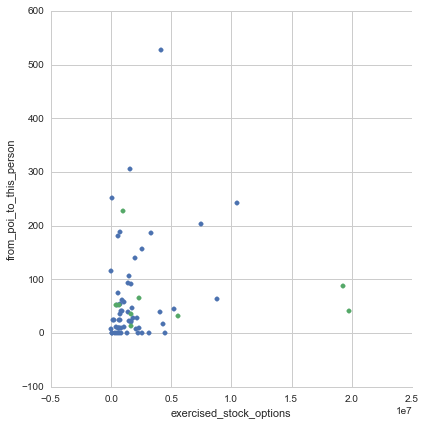

In [151]:
g = sns.FacetGrid(df_raw, hue = 'poi', size = 6)
g.map(plt.scatter, 'exercised_stock_options', 'from_poi_to_this_person')

##Features

In [126]:
financial_vars = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']

email_vars = ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

##Scale Features

Here we scale the features using MinMaxScaler.

In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
idx = df.index
df = scaler.fit_transform(df.ix[:, financial_vars + email_vars + ['poi']].fillna(0))
df = DataFrame(df, columns = financial_vars + email_vars + ['poi'], index = idx)
df.ix[:, financial_vars + email_vars] = df.ix[:, financial_vars + email_vars].replace(0, np.nan)

##Output to Dataset

##Scatter Matrix

Plot a scatter matrix to see if there is any pattern between each feature. 

ZeroDivisionError: 0.0 cannot be raised to a negative power

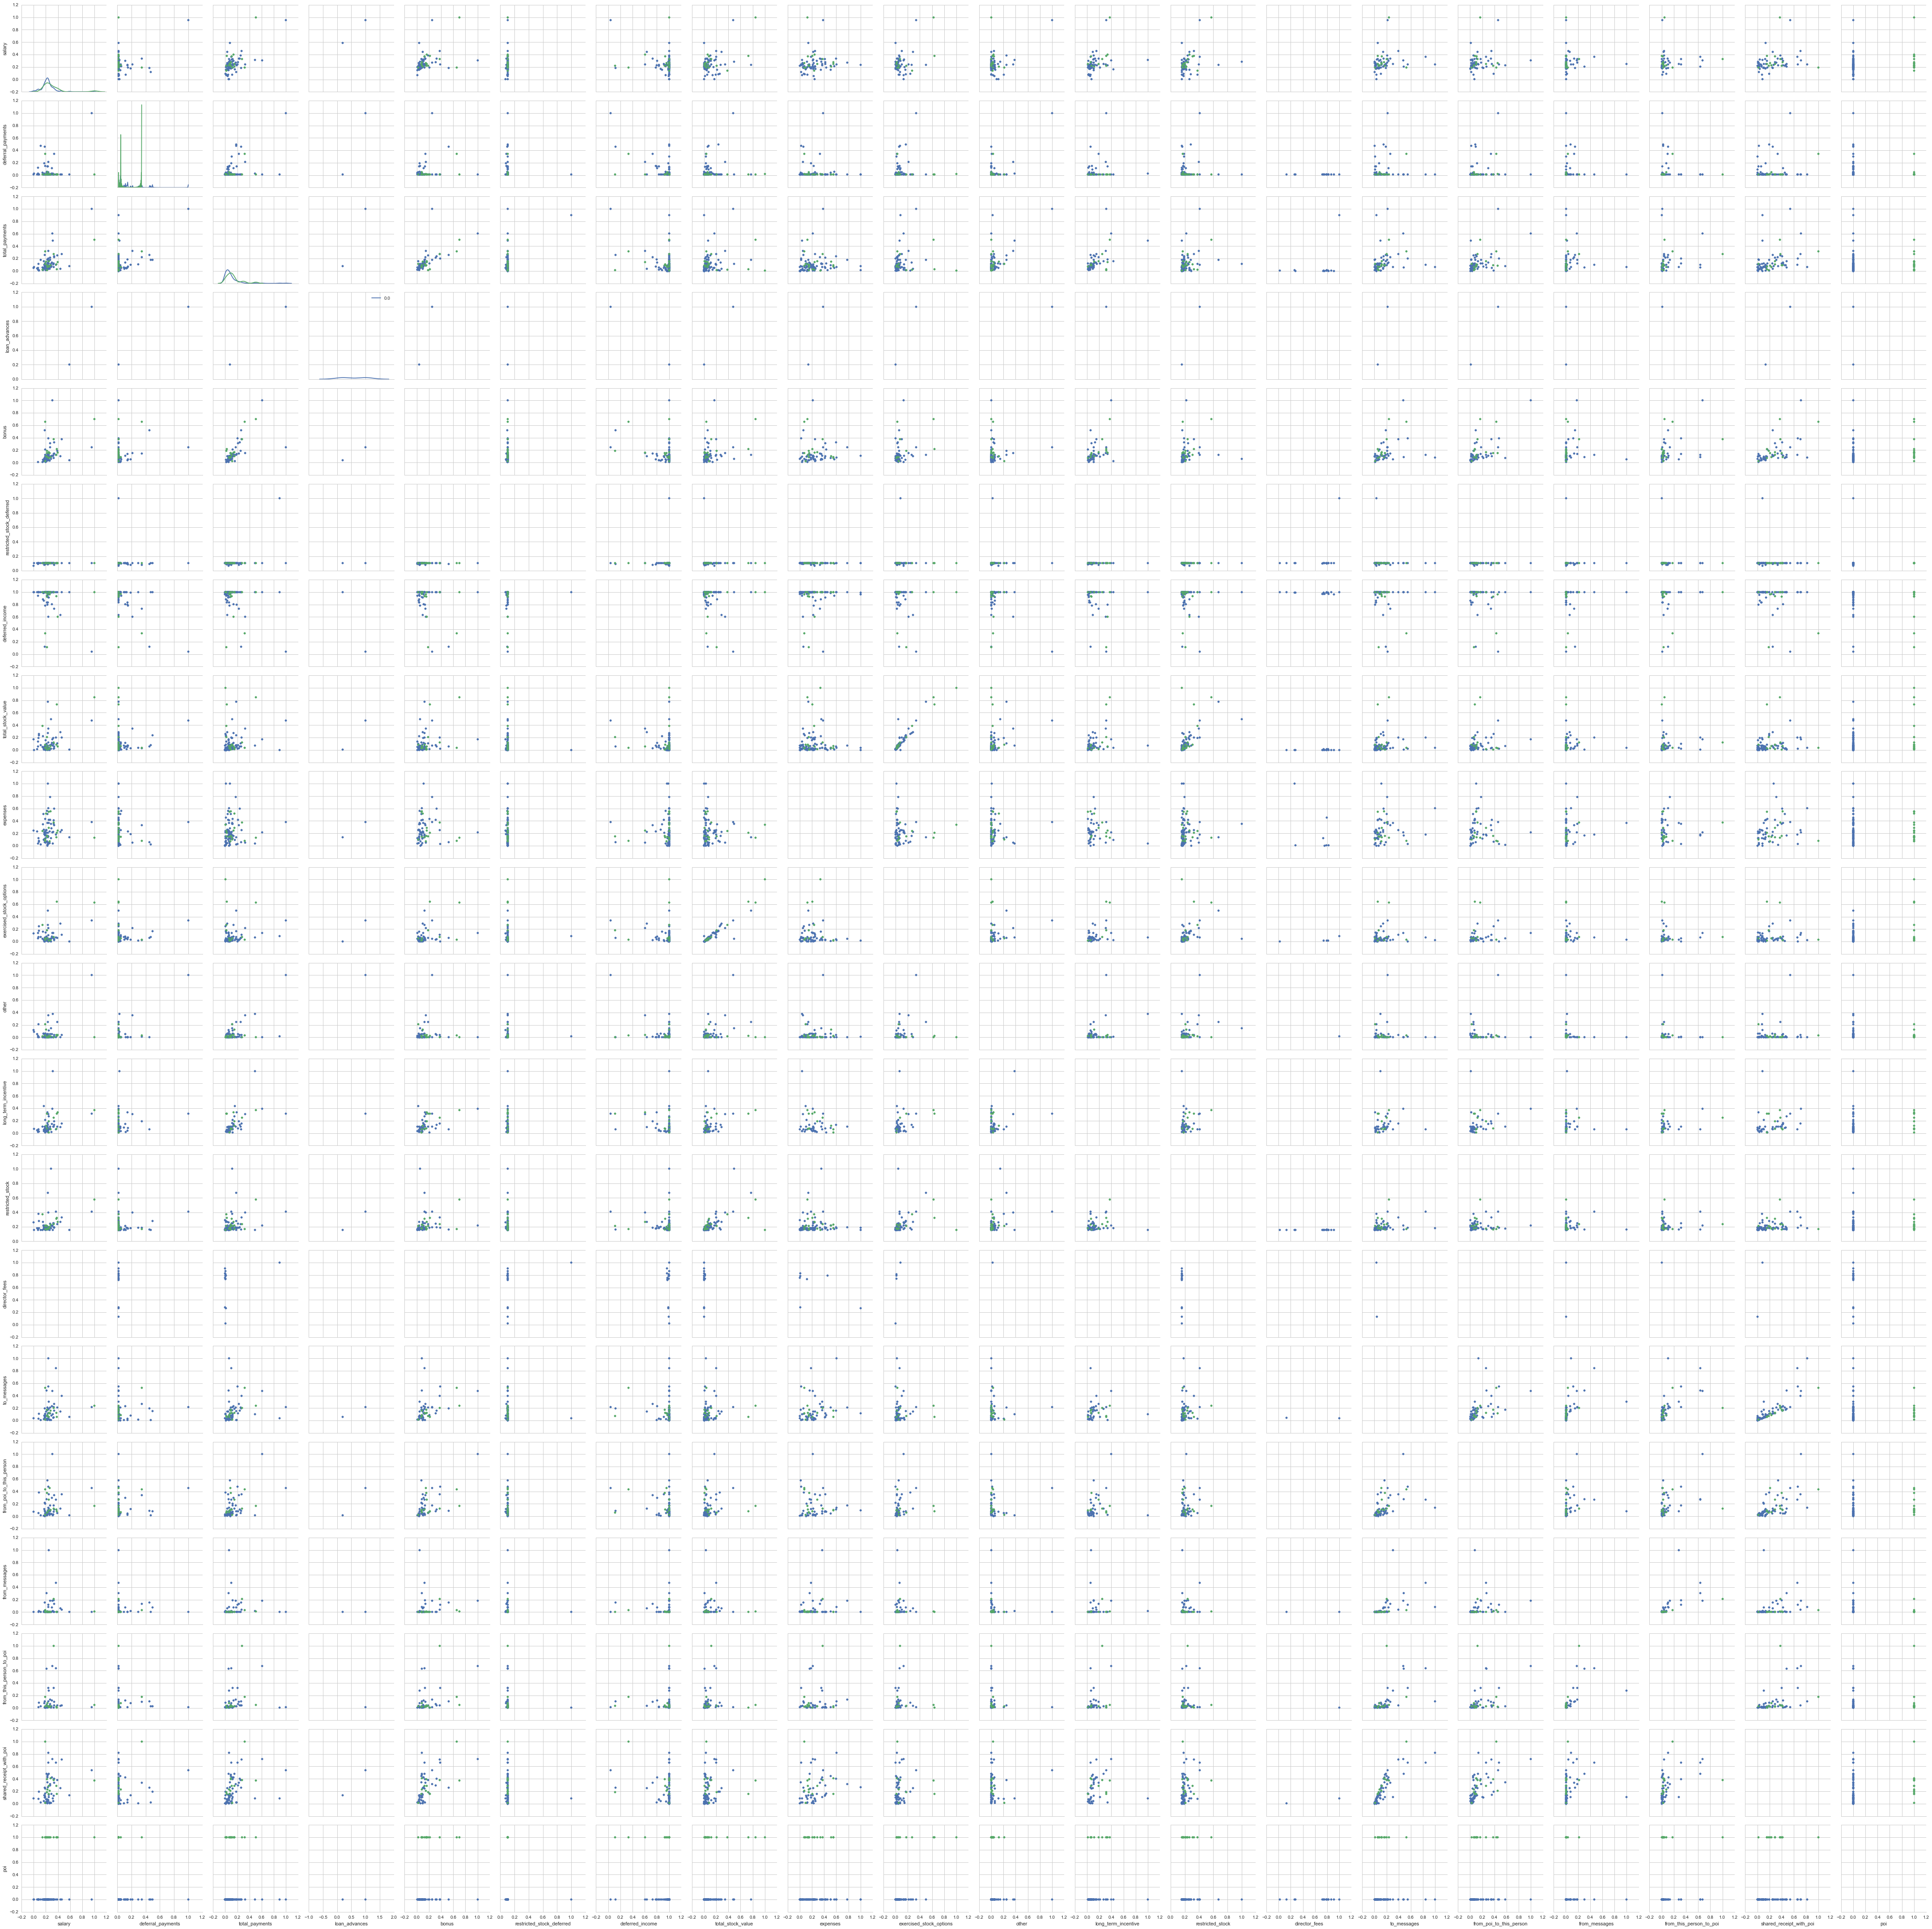

In [131]:
g = sns.PairGrid(df, hue = 'poi', vars = financial_vars + email_vars, size = 3)
g.map_offdiag(plt.scatter)
# g.map_diag(plt.hist,bins = 10, range = (0, 1))
# g.map_diag(sns.kdeplot)
g.savefig('scatter_matrix.png')